In [1]:
#import things we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from scipy.stats import zscore
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Load data, rotate as needed, join dataframes together for ease of processing later

In [2]:
set_metric='euclidean'
set_stdevs=1

In [3]:
#import  data DAT-cre
DATcre66T = pd.read_excel(r'data/8dat-crebrains.xlsx')
#and import dat cre and gad2 also from 76 brain set
DATcre66T_gad2 = pd.read_excel(r'data/12datcre-and-gad2.xlsx')

In [4]:
DATcre66T_gad2

,Experimental condition,Cortex,NAcMed,NAcLat,NAcCore,DStr,VP,PO,Septum,BNST,...,LHb,MHb,CeA,LH,ZI,DR,LDT,PBN,DCN,condition_nums
0,DAT-Cre,4.539353,5.564369,4.795607,5.491153,6.314826,11.000610,5.289811,0.787065,1.629042,...,4.502746,2.837096,2.397804,8.419768,5.564369,11.147041,0.701647,4.557657,0.658938,DAT-Cre-1
1,DAT-Cre,3.458260,5.113636,4.572771,4.736670,4.458042,11.161495,6.244537,3.114073,1.966783,...,7.227928,3.605769,2.769886,8.686626,4.851399,9.866696,1.300262,6.621503,0.508086,DAT-Cre-2
2,DAT-Cre,1.838390,7.768099,6.650646,11.282667,27.053169,5.893662,3.045960,0.288375,1.676179,...,2.306999,0.612797,1.766296,4.235506,5.551217,6.109943,0.312406,2.973866,0.486633,DAT-Cre-3
3,DAT-Cre,2.448574,6.700491,3.722495,4.963327,11.986434,11.928528,5.062593,1.381459,1.836431,...,5.691281,5.219765,2.638835,7.949595,3.904484,9.860475,0.799647,3.879667,0.901671,DAT-Cre-4
4,DAT-Cre,4.309921,4.328340,4.641454,4.365177,5.654470,8.380403,4.254666,0.276277,0.847250,...,4.530943,0.847250,3.536346,9.448674,5.120334,12.285118,2.492633,8.988212,1.841847,DAT-Cre-5
5,DAT-Cre,2.850023,9.484504,0.934434,3.877901,2.476250,10.185329,5.139386,1.074599,2.943467,...,5.326273,2.616415,2.336085,14.577169,2.242641,17.287027,1.884442,5.186108,0.140165,DAT-Cre-6
6,DAT-Cre,3.945733,8.077879,2.485501,5.126346,8.761392,7.456504,4.504971,1.475766,2.268020,...,5.172949,4.893331,2.563173,10.314830,3.448633,11.977009,3.189727,4.753521,0.714582,DAT-Cre-7
7,DAT-Cre,5.830871,4.330530,4.160036,2.216413,9.240737,6.308252,0.443283,0.375085,3.375767,...,2.557399,0.613776,5.217095,10.365992,5.967265,10.638782,1.761764,9.786315,2.455103,DAT-Cre-8
8,Gad2-Cre,5.113767,5.470007,7.078832,5.734314,9.790853,9.020915,5.596415,1.160653,1.804183,...,3.895656,2.286831,4.332337,4.562170,7.894737,8.250977,0.436681,4.470237,1.149161,Gad2Cre 100 nL-1
9,Gad2-Cre,7.681486,0.844119,1.688239,0.000000,1.435003,8.019133,3.967361,0.844119,1.435003,...,10.382667,8.019133,1.772651,4.811480,23.550929,7.259426,0.562746,3.798537,7.175014,Gad2Cre 100 nL-2


In [5]:
VGlut2_cre = pd.read_excel(r'data/vGluT2-Cre.xlsx')

In [6]:
#import  data (all DA cells)
all_DA_cells = ['Cocaine','Control ketamine anesthesia','Control isoflurane anesthesia','Amphetamine',
                'Nicotine','Morphine','Fluoxetine','MDMA group','MDMA isolated','Ethanol','Stress',
                'GAD2-Cre isoflurane','GAD2-Cre Cocaine','GAD2-Cre isoflurane (lateral)']
all_DA_cells_df = {} #empty dictionary
num_drugs=len(all_DA_cells) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=all_DA_cells[drug])
    #add id column with drug name and condition
    tempdf['condition']=all_DA_cells[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    all_DA_cells_df[drug]=tempdf #put into dictionary at index

In [7]:
# #import NAcMed data
NAcMeds = ['cTRIO NAcMed cocaine 1 inj','NAcMed controls','cTRIO NAcMed C 5 inj',
          'cTRIO NAcMed FC','cTRIO NAcMed ketamine anesthesi']
NAcMeds_df = {} #empty dictionary
num_drugs=len(NAcMeds) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcMeds[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcMeds[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcMeds_df[drug]=tempdf #put into dictionary at index

In [8]:
NAcMed_data=pd.concat(
    NAcMeds_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [9]:
# #import NAcLat data
NAcLats = ['cTRIO NAcLat cocaine','NAcLat iso saline controls','cTRIO NAcLat C 5 inj',
          'cTRIO NAcLat FC','cTRIO NAcLat ketamine anesthesi']
NAcLats_df = {} #empty dictionary
num_drugs=len(NAcLats) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcLats[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcLats[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcLats_df[drug]=tempdf #put into dictionary at index

In [10]:
#combine NAcLat data
NAcLat_data=pd.concat(
    NAcLats_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [11]:
# #import DLS data
DLSs = ['DLS_sal','DLS_coc1x','DLS_FC']
DLSs_df = {} #empty dictionary
num_drugs=len(DLSs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=DLSs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=DLSs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    DLSs_df[drug]=tempdf #put into dictionary at index

In [12]:
#combine DLS data
DLS_data=pd.concat(
    DLSs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [13]:
# #import amygdala data
Amygs = ['cTRIO Amygdala cocaine 1 dose','cTRIO Amygdala isoflurane anest','cTRIO Amygdala AFC']
Amygs2= ['cTRIO Amygdala ketamine anesthe']
Amygs_df = {} #empty dictionary
num_drugs=len(Amygs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=Amygs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=Amygs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=Amygs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=Amygs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[3]=tempdf #put into dictionary at index

In [14]:
#combine Amyg data
Amyg_data=pd.concat(
    Amygs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [15]:
Amyg_data.dropna(inplace=True,axis=1)

In [16]:
#import mPFC data
mPFCs = ['cTRIO mPFC isoflurane anesthesi','cTRIO mPFC cocaine 1 dose','cTRIO mPFC AFC']
mPFCs2= ['cTRIO mPFC ketamine anesthesia']
mPFCs_df = {} #empty dictionary
num_drugs=len(mPFCs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=mPFCs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=mPFCs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=mPFCs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=mPFCs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[3]=tempdf #put into dictionary at index

In [17]:
# combine mPFC data
mPFC_data=pd.concat(
    mPFCs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [18]:
mPFC_data.dropna(inplace=True,axis=1)

In [19]:
all_data=pd.concat(
    all_DA_cells_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [20]:
categories= pd.DataFrame({'group_name':['Psychostimulants','Controls','Controls',
                          'Psychostimulants','Other','Other','Controls','MDMA','MDMA','Other',
                          'Other','GAD2-Cre','GAD2-Cre','GAD2-Cre'],'condition5':all_DA_cells})
categories2= pd.DataFrame({'group_name':['Cocaine','Controls','Cocaine',
                          'FC','Controls'],'condition5':NAcMeds})
categories3= pd.DataFrame({'group_name':['Cocaine','Controls','Cocaine',
                          'FC','Controls'],'condition5':NAcLats})
categories4= pd.DataFrame({'group_name':['Cocaine','Controls','AFC',
                          'Controls'],'condition5':['cTRIO Amygdala cocaine 1 dose','cTRIO Amygdala isoflurane anest','cTRIO Amygdala AFC','cTRIO Amygdala ketamine anesthe']})
categories5= pd.DataFrame({'group_name':['Controls','Cocaine',
                          'AFC','Controls'],'condition5':['cTRIO mPFC isoflurane anesthesi','cTRIO mPFC cocaine 1 dose','cTRIO mPFC AFC','cTRIO mPFC ketamine anesthesia']})
categories6= pd.DataFrame({'group_name':['DAT-Cre','DAT-Cre','GAD2-Cre'],'condition5':['DAT-Cre', 'DAT-Cre 66T','Gad2-Cre']})
categories7= pd.DataFrame({'group_name':['vGluT2-Cre'],'condition5':['vGluT2-Cre']})
categories=pd.concat([categories,categories2,categories3,categories4,categories5,categories6,categories7])

In [21]:
all_data.replace({'GAD2-Cre isoflurane': 'Gad2-Cre', 'GAD2-Cre isoflurane (lateral)': 'Gad2-Cre'},inplace=True)

# Define some functions, variables, and other things we will use

In [22]:
uniq_colors=['mediumorchid','gray','royalblue','darkred','red','hotpink',
             'khaki','palegreen','seagreen','orange','lavender',
             'steelblue','navy','dodgerblue','thistle','violet',
             'deeppink','pink','slateblue','peru','darkorange',
             'magenta','cyan','lightcoral','lawngreen',
             'burlywood'] # to use later
uniq_colors2=['mediumorchid','gray','royalblue','darkred','hotpink',
             'khaki','palegreen','seagreen','orange','lavender',
             'steelblue','navy','dodgerblue','thistle','violet',
             'deeppink','pink','slateblue','peru','darkorange',
             'magenta','cyan','lightcoral','lawngreen',
             'burlywood','red'] # to use later

In [23]:
#from https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(x, y, ax, n_std=set_stdevs, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [24]:
def signif(x, p): #get p significant digits of all of a numpy array (why does base numpy not have this...)
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

In [25]:
def plot_components(components_df): #plot feature importance of the PCA components 1-5
    #code adapted from 
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    fig, ax = plt.subplots(figsize=(6, 13))
    comptemp0=components_df.transpose()
    comptemp1=comptemp0.to_numpy()
    comptemp=signif(comptemp1,3)
    im = ax.imshow(comptemp)
    pca5=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']
    regions=components_df.columns
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(pca5)))
    ax.set_yticks(np.arange(len(regions)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(pca5)
    ax.set_yticklabels(regions)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fig.colorbar(im)

    # Loop over data dimensions and create text annotations.
    for i in range(len(regions)):
        for j in range(len(pca5)):
            text = ax.text(j, i, comptemp[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Components and Feature Importance")
    fig.tight_layout()
    plt.show()

In [26]:
def make_pca_plots_label(pc1,pc2,pc3,group,labels): #makes plots of pc1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'pc1': pc1.values,'pc2': pc2.values,'pc3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    for i, txt in enumerate(group):
        ax.annotate(txt, (pc1[i], pc2[i]))
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 3')
    for i, txt in enumerate(group):
        ax.annotate(txt, (pc1[i], pc3[i]))
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 2')
        ax.set_ylabel('PC 3')
    for i, txt in enumerate(group):
        ax.annotate(txt, (pc2[i], pc3[i]))
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [27]:
def make_pca_plots_ellipse(pc1,pc2,pc3,group,labels,grouped_elipse='no'): #makes plots of pc1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'pc1': pc1.values,'pc2': pc2.values,'pc3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
    if grouped_elipse=='no':
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
            confidence_ellipse(drug1['pc1'],drug1['pc2'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0)
            ax.set_xlabel('PC 1')
            ax.set_ylabel('PC 2')
        ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
        plt.show()
        fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
            confidence_ellipse(drug1['pc1'],drug1['pc3'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0)
            ax.set_xlabel('PC 1')
            ax.set_ylabel('PC 3')
        ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
        plt.show()
        fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
            confidence_ellipse(drug1['pc2'],drug1['pc3'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0)
            ax.set_xlabel('PC 2')
            ax.set_ylabel('PC 3')
    else:
        align_embed['condition5']=labels #categories
        category_df=align_embed.merge(categories,on='condition5',copy=True).dropna()
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
            ax.set_xlabel('PC 1')
            ax.set_ylabel('PC 2')
        for i,r in enumerate(np.unique(category_df['group_name'])):
            drug1=category_df[category_df['group_name']== r]
            confidence_ellipse(drug1['pc1'],drug1['pc2'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0,label=r)
        ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
        plt.show()
        fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
            ax.set_xlabel('PC 1')
            ax.set_ylabel('PC 3')
        for i,r in enumerate(np.unique(category_df['group_name'])):
            drug1=category_df[category_df['group_name']== r]
            confidence_ellipse(drug1['pc1'],drug1['pc3'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0,label=r)
        ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
        plt.show()
        fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
            ax.set_xlabel('PC 2')
            ax.set_ylabel('PC 3')
        for i,r in enumerate(np.unique(category_df['group_name'])):
            drug1=category_df[category_df['group_name']== r]
            confidence_ellipse(drug1['pc2'],drug1['pc3'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0,label=r)
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [28]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    labels=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features=dataframe.iloc[: , 2:24]
    regions=features.columns
    return features, labels, condition_nums, regions

In [29]:
gad2only2=all_data[(all_data["condition"] == 'Gad2-Cre')]
features4, labels4, condition_nums4, regions4 = get_feats_and_labels(gad2only2)

In [30]:
#modularized pieter's code
def umap_n_times(X_scaled,labels,N = 20,n_neighbors=15,metric='euclidean'):
    umap_distances = np.zeros((len(labels),len(labels),N,))
    for n in range(0,N):
        embedding=umap.UMAP(n_neighbors=n_neighbors,metric=metric).fit_transform(X_scaled)
        for r1 in range(0,len(labels)):
            for r2 in range(0,len(labels)):
                d = np.sum((embedding[r1]-embedding[r2])**2)**(0.5)
                umap_distances[r1,r2,n]=d
        max_distance = np.max(umap_distances[:,:,n])
        umap_distances[:,:,n] = umap_distances[:,:,n]/max_distance
    umap_distances_means = np.mean(umap_distances,axis=2)
    return umap_distances_means

In [31]:
#modularized pieter's code
def umap_dist_heatmap(t1,indexed='no'):
    if indexed=='yes':
        labs=labels.values
        uniq=list(range(len(labels)))
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    else:
        labs=labels.values
        uniq=[x[1] for x in labels.index.values]
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    fig,ax =plt.subplots(figsize=(10,4))
    plt.pcolor(t1, cmap="RdYlBu_r")

    plt.yticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.xticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.colorbar()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.show()

In [32]:
#modularized pieter's code
def pca_distance(pc1,pc2,pc3,labels):
    pca_distances = np.zeros((len(labels),len(labels)))
    for r1 in range(0,len(labels)):
        for r2 in range(0,len(labels)):
            d = ((pc1[r1]-pc1[r2])**2 +(pc2[r1]-pc2[r2])**2+(pc3[r1]-pc3[r2])**2)**(0.5)
            pca_distances[r1,r2]=d #euclidean distance
    max_distance = np.max(pca_distances[:,:])
    pca_distances[:,:] = pca_distances[:,:]/max_distance #normalized
    return pca_distances

In [33]:
def distance_to_other_points(to_heatmap,labels,condition_nums,umap_or_pca):
    means_df2 = pd.DataFrame(to_heatmap,index=labels,columns=condition_nums)
    labels2=[str(s) +'_average' for s in labels]
    means_df2['condition2']=labels2
    means_df2=means_df2.groupby(['condition2']).mean().transpose()
    cm = sns.clustermap(means_df2,yticklabels=True,xticklabels=True)
    cm.fig.suptitle("point distance - average by condition 1 axis"+umap_or_pca)
    cm.fig.set_size_inches(18, 18)
    plt.show()
    means_df2['condition3']=labels2
    means_df2=means_df2.groupby(['condition3']).mean().transpose()
    cm = sns.clustermap(means_df2,yticklabels=True,xticklabels=True)
    cm.fig.suptitle("point distance - average by condition both axis"+umap_or_pca)
    cm.fig.set_size_inches(18, 18)
    plt.show()

In [34]:
def umap_and_heatmap(X_scaled,labels,condition_nums,grouped_elipse='no'):
    neighbors=int(len(labels)/3)
    metrics=set_metric
    reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors) 
    embedding = reducer.fit_transform(X_scaled)

    align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
#     fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
#     for i,r in enumerate(np.unique(align_embed.index.values)):
#         drug1=align_embed[align_embed.index == r]
#         ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
#     for i, txt in enumerate(condition_nums):
#         ax.annotate(txt, (embedding[i,0], embedding[i,1]))
#     ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
#     ax.set_xlabel('UMAP 1')
#     ax.set_ylabel('UMAP 2')
#     plt.show()
    
    fig, ax = plt.subplots(figsize=(12, 10)) #init  fig
    if grouped_elipse=='no':
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
            confidence_ellipse(drug1['umap1'],drug1['umap2'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0)
    else:
        align_embed['condition5']=labels #categories
        category_df=align_embed.merge(categories,on='condition5',copy=True).dropna()
        for i,r in enumerate(np.unique(align_embed.index.values)):
            drug1=align_embed[align_embed.index == r]
            ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
        for i,r in enumerate(np.unique(category_df['group_name'])):
            drug1=category_df[category_df['group_name']== r]
            confidence_ellipse(drug1['umap1'],drug1['umap2'], ax, alpha=0.5, n_std=set_stdevs, facecolor=uniq_colors2[i], edgecolor=uniq_colors2[i], zorder=0,label=r)
    leg2 = ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    plt.show()

    #distance heatmap
    to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
    means_df = pd.DataFrame(to_heatmap,index=condition_nums,columns=condition_nums)
    cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
    cm.fig.suptitle("average umap relative distance")
    cm.fig.set_size_inches(18, 18)
    plt.show()
    distance_to_other_points(to_heatmap,labels,condition_nums,' - UMAP') # umap

In [35]:
def get_feats_and_labels(dataframe):
    labels=dataframe['Experimental condition']
    condition_nums=dataframe['condition_nums']
    features=dataframe.iloc[: , 1:23]
    regions=features.columns
    return features, labels, condition_nums, regions

# Get features from DAT-cre and 66T data

# DAT-cre and 66T and Gad2Cre (no drugs)

In [36]:
features2, labels2, condition_nums2, regions2 = get_feats_and_labels(DATcre66T_gad2)
features3, labels3, condition_nums3, regions3 = get_feats_and_labels(VGlut2_cre)
labels=list(labels2)+list(labels4)+list(labels3)
condition_nums=list(condition_nums2)+list(condition_nums4)+list(condition_nums3)
#scale X 

X2=features2.to_numpy().astype(float)
X3=features3.to_numpy().astype(float)
X4=features4.to_numpy().astype(float)
#features4, labels4, condition_nums4, regions4
X=np.vstack((X2, X4))
X=np.vstack((X, X3))
#get rid of NAs before scaling

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

In [37]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions2)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[5.86175551 4.81035865 2.90445983 2.5583449  1.47637411]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.909981,-1.906353,-0.334941,0.859949,-0.462518
1,-4.122065,-0.063327,0.203715,-0.515372,-0.329549
2,0.966903,-1.321965,-2.041762,-1.694954,2.969634
3,-3.041671,-0.588525,-0.547807,-0.967425,1.273760
4,-1.550561,-2.110890,1.487402,2.481999,-0.602997
5,-2.272228,1.076339,3.050992,-1.075718,2.019257
6,-2.584175,-0.508442,1.402669,-1.222617,0.888900
7,0.253767,-1.390093,1.529580,3.909066,1.084163
8,-2.379046,-3.059369,-2.799682,1.532452,-0.709205
9,-0.012753,4.526069,-2.169238,0.746347,-0.345686


### PCA Plots

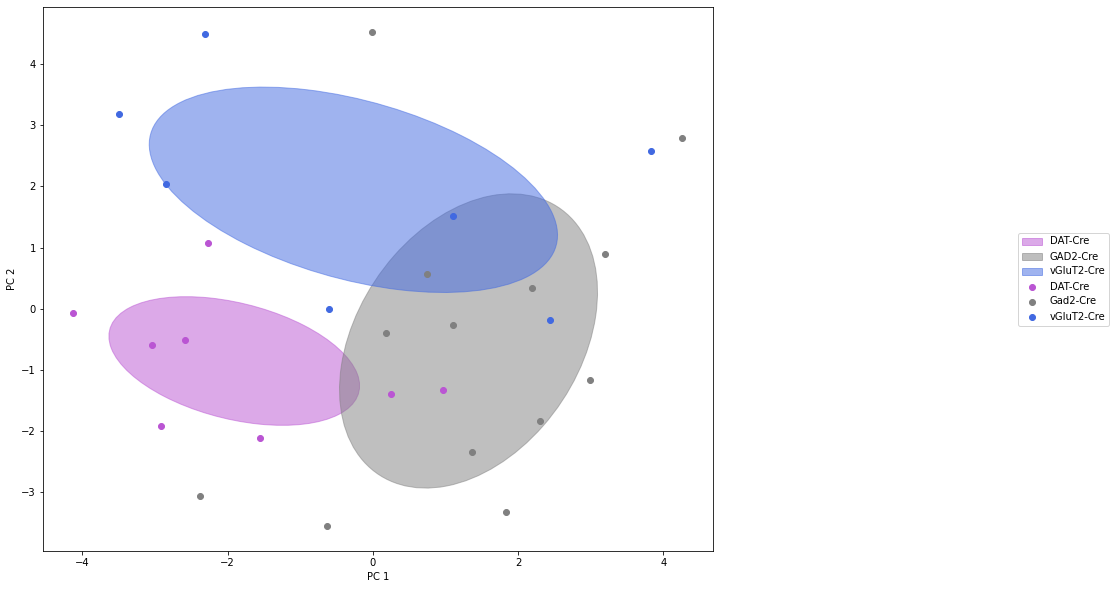

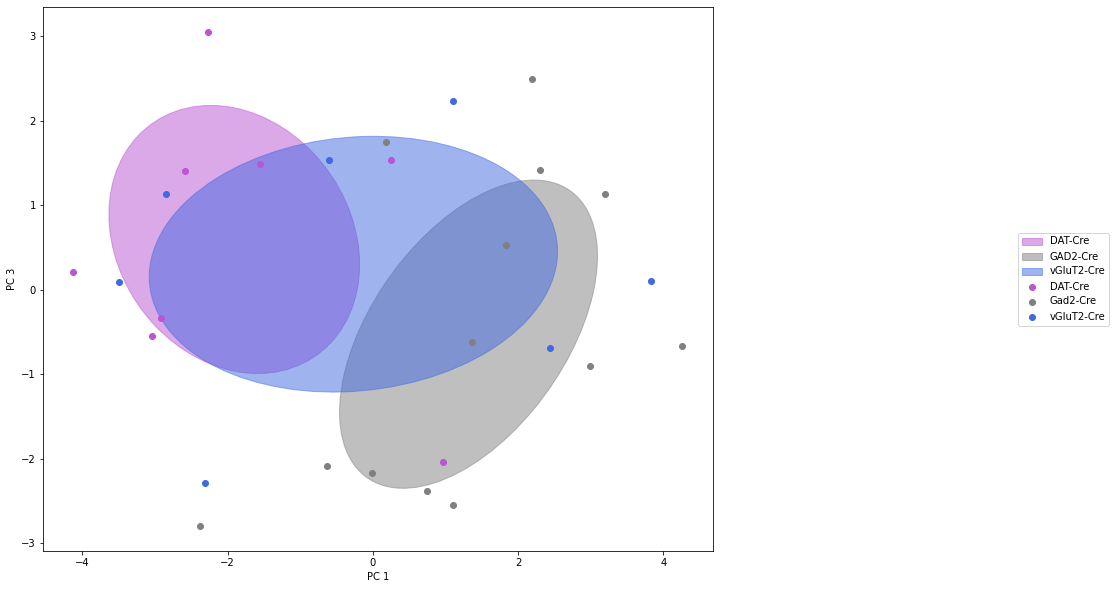

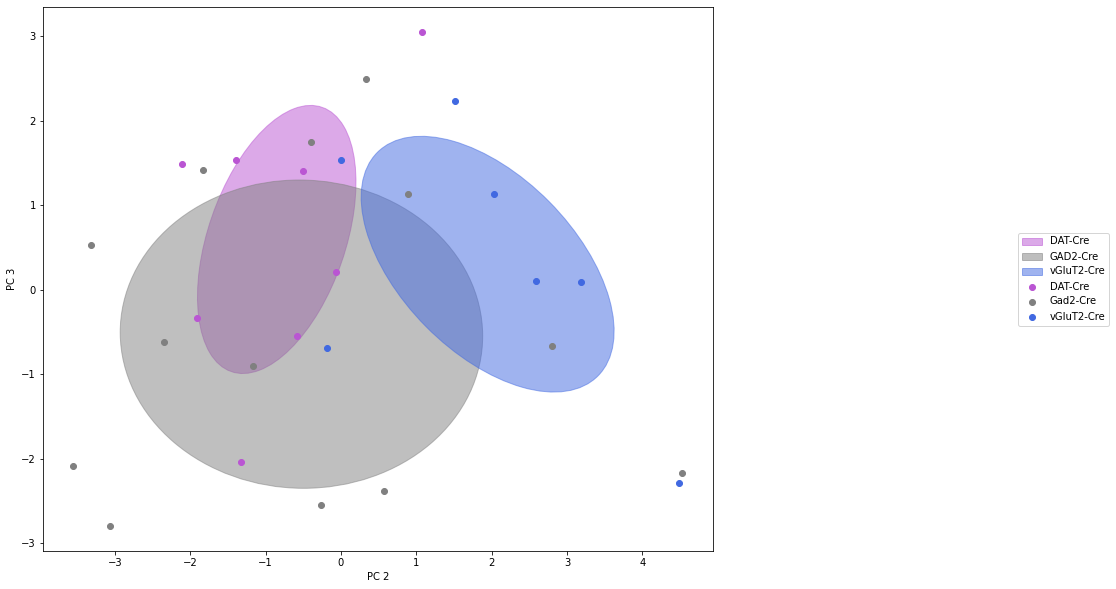

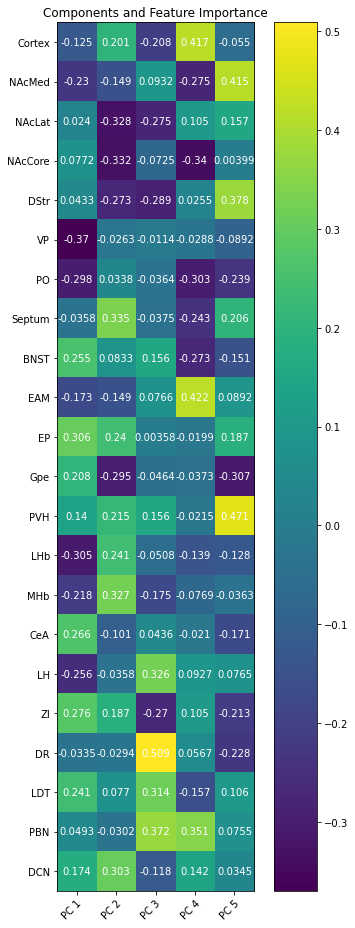

In [38]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
#make_pca_plots_label(pc1,pc2,pc3,condition_nums,labels)
make_pca_plots_ellipse(pc1,pc2,pc3,condition_nums,labels,grouped_elipse='yes')
plot_components(region_components)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


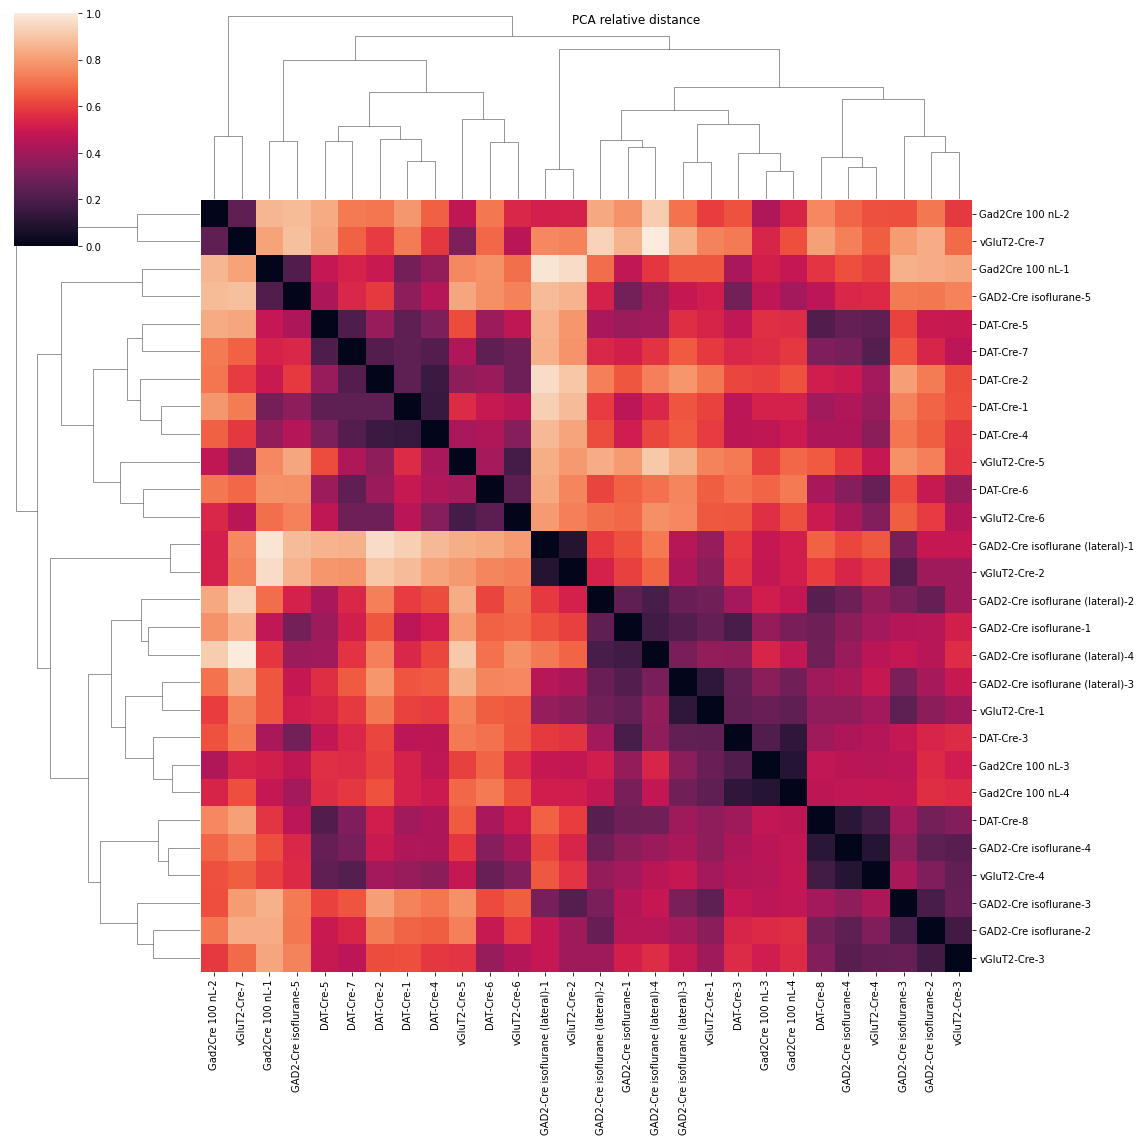

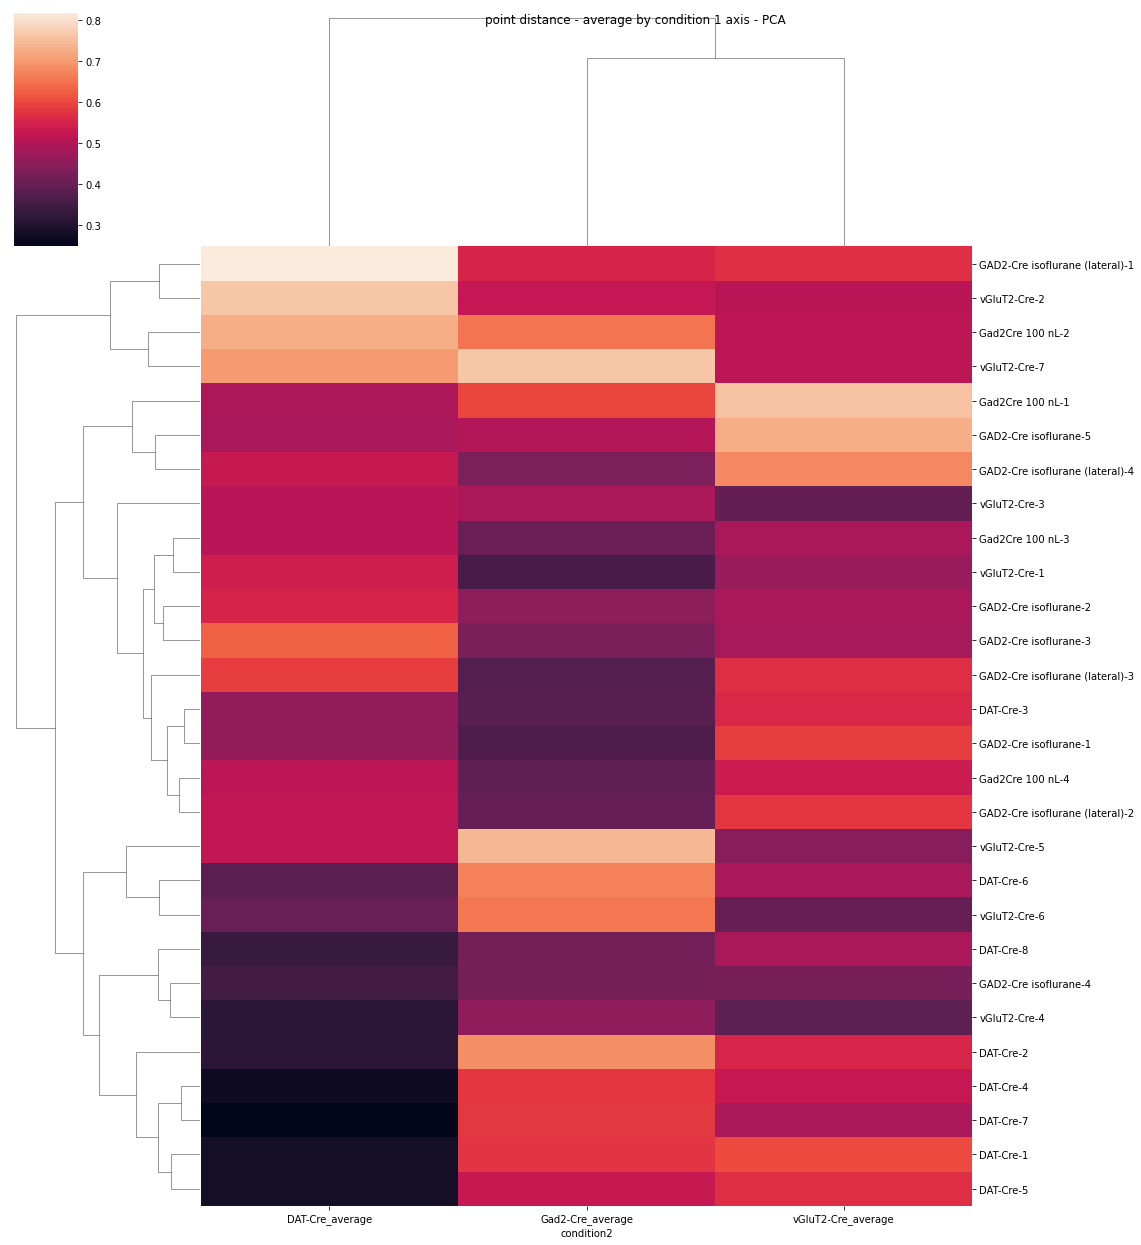

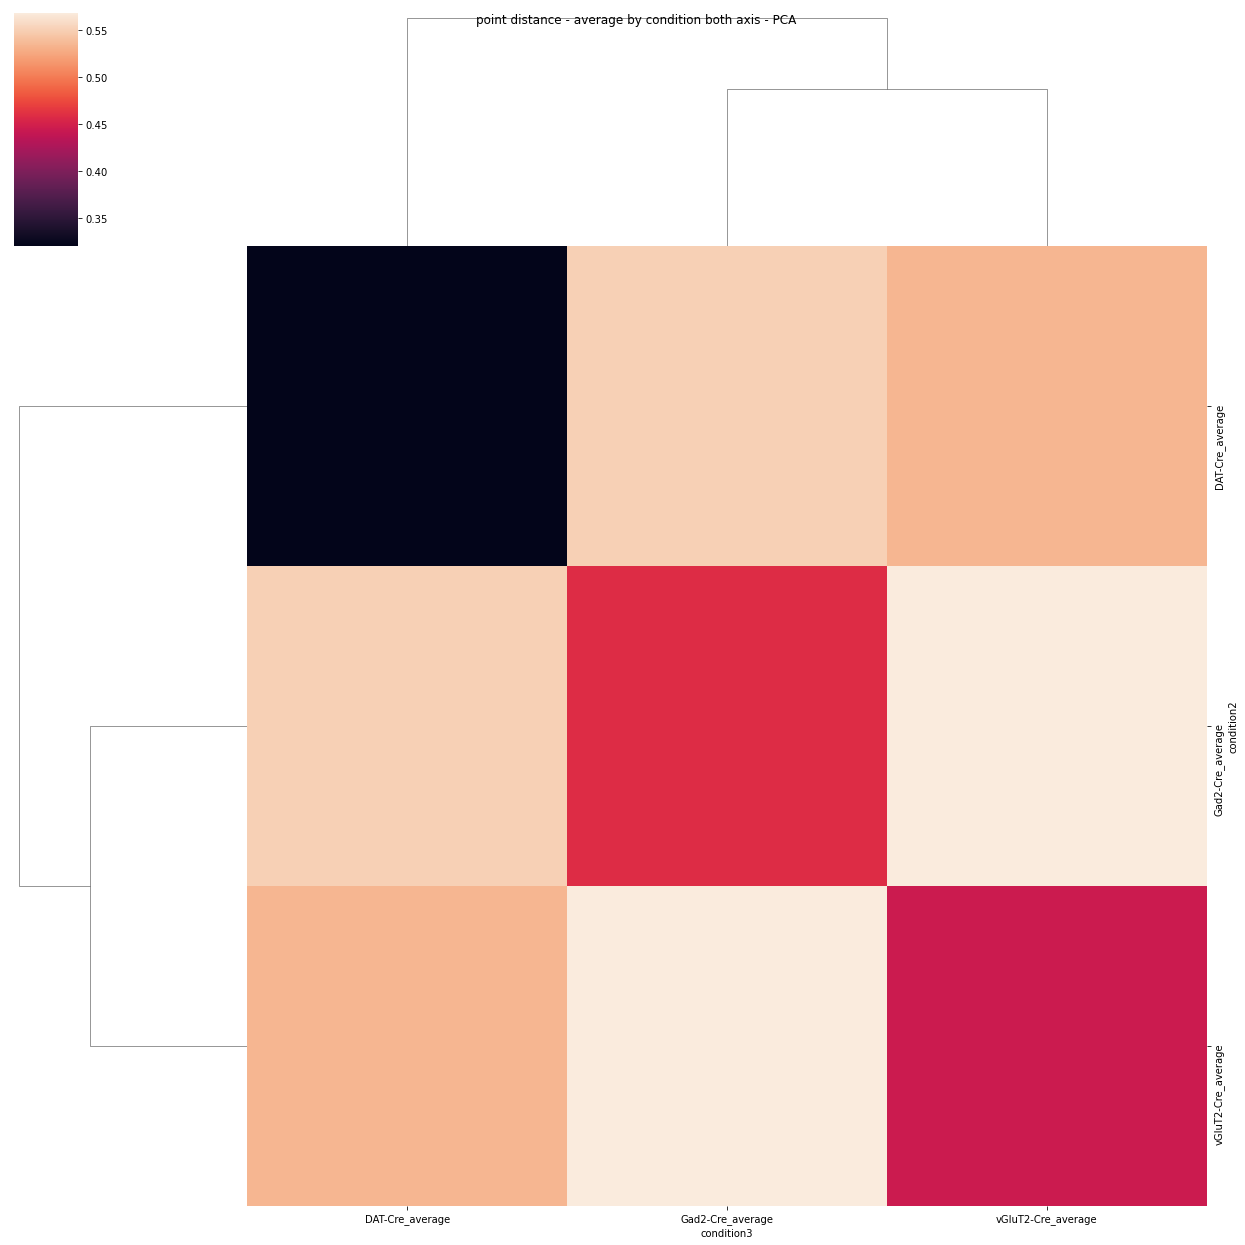

In [39]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=condition_nums,columns=condition_nums)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)
plt.show()
distance_to_other_points(pca_dist,labels,condition_nums,' - PCA') # pca 

### UMAP

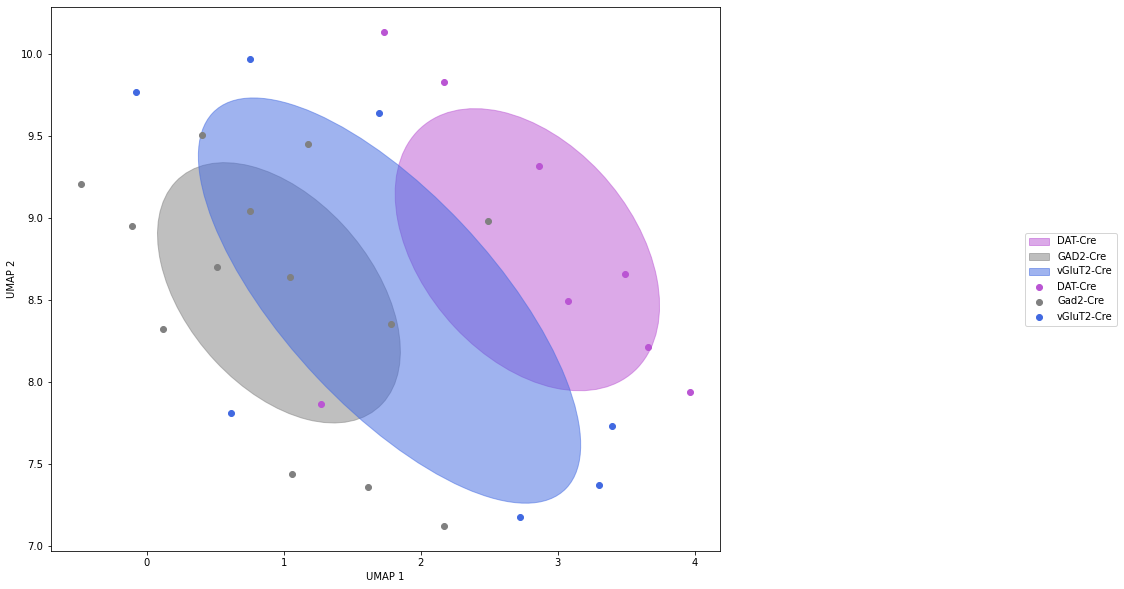

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


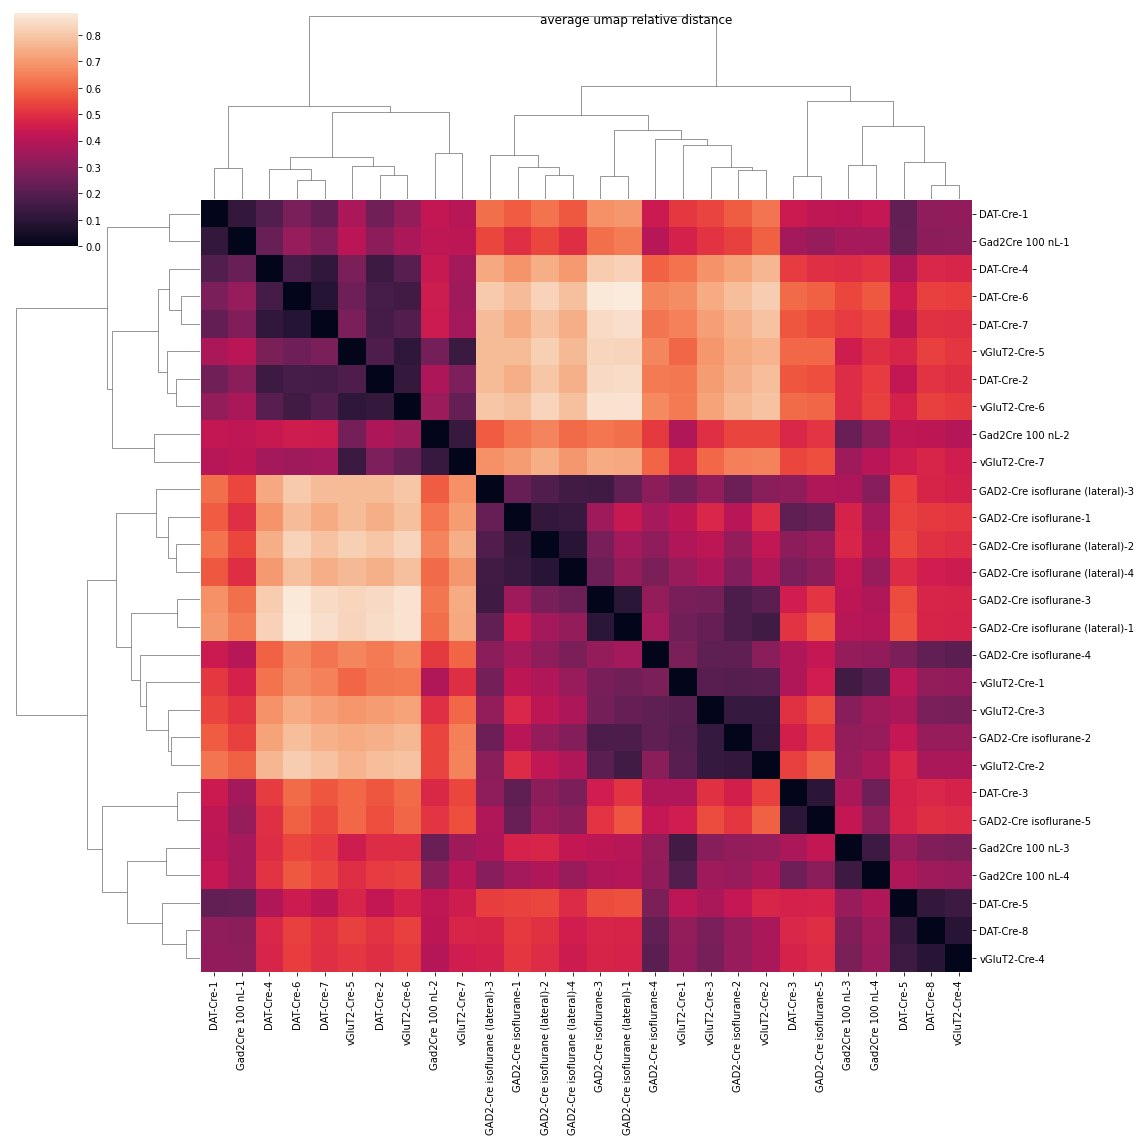

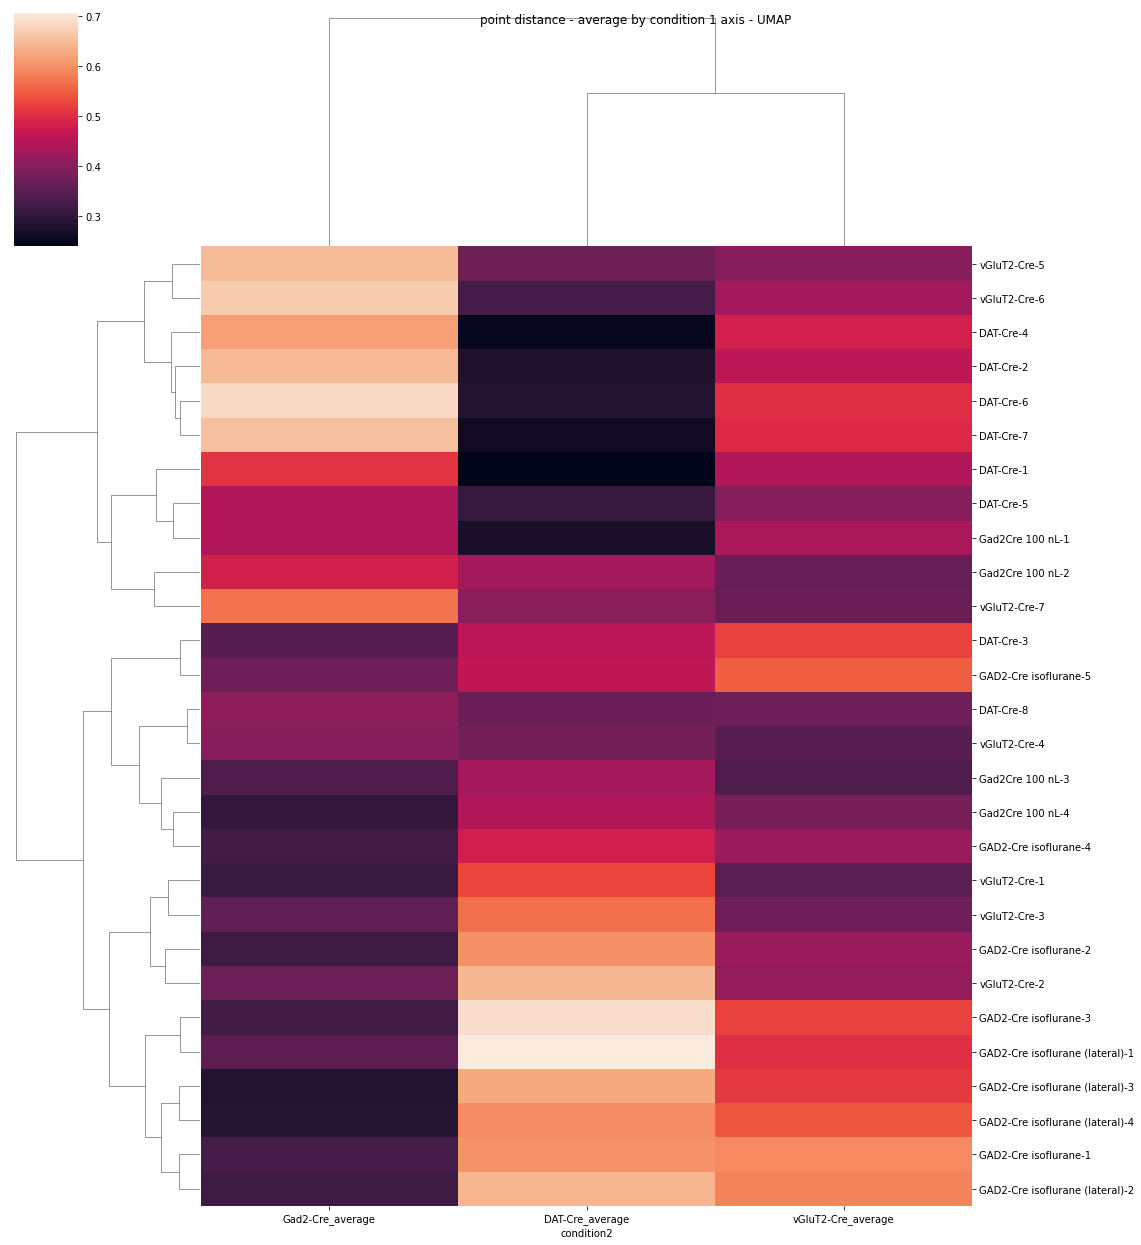

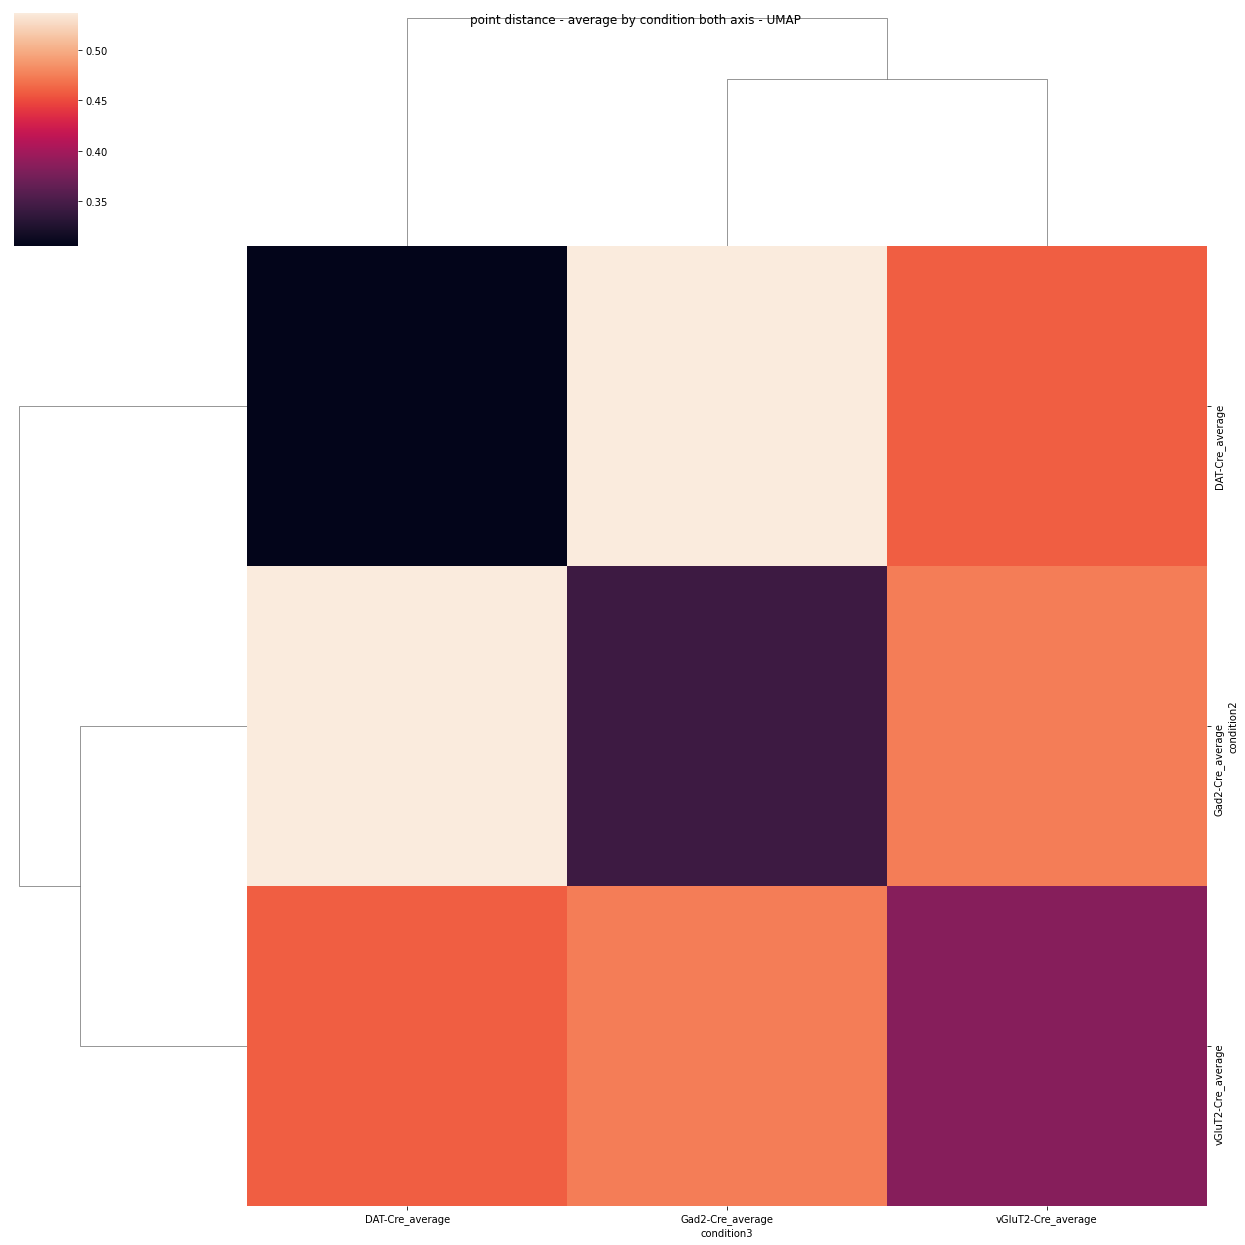

In [40]:
umap_and_heatmap(X_scaled,labels,condition_nums,grouped_elipse='yea')